In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('all_reviews.csv')
df.head()

,source,retailer,product_id,product_name,rating,submission_time,user_nickname,review_text,price
0,bazaarvoice,sephora_ca,2558328,Dior Forever Skin Glow,1,2025-10-20 01:06:41+00:00,Alaa71,they sold items used before never buy online i...,77 CAD
1,bazaarvoice,sephora_ca,2558047,Dior Forever Skin Glow,1,2025-09-30 23:06:18+00:00,BrettC,"I was colour matched in the store, but I thoug...",77 CAD
2,bazaarvoice,sephora_ca,2558062,Dior Forever Skin Glow,5,2025-09-16 22:58:22+00:00,computerface21,"WOW. Great coverage but doesn't look ""cakey"" ...",77 CAD
3,bazaarvoice,sephora_ca,2557999,Dior Forever Skin Glow,5,2025-09-16 02:56:02+00:00,PandaMochi,I think I may have found my holy grail foundat...,77 CAD
4,bazaarvoice,sephora_ca,2558054,Dior Forever Skin Glow,5,2025-08-16 03:04:05+00:00,pbutter234,Absolutely loving it. It gives such a smooth a...,77 CAD


In [8]:
df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           1003 non-null   object
 1   retailer         1003 non-null   object
 2   product_id       1003 non-null   object
 3   product_name     1003 non-null   object
 4   rating           1003 non-null   int64 
 5   submission_time  1003 non-null   object
 6   user_nickname    984 non-null    object
 7   review_text      1000 non-null   object
 8   price            1003 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.7+ KB


,rating
count,1003.000000
mean,4.240279
std,1.290644
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


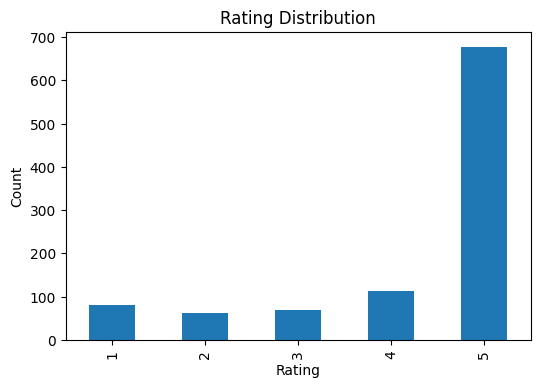

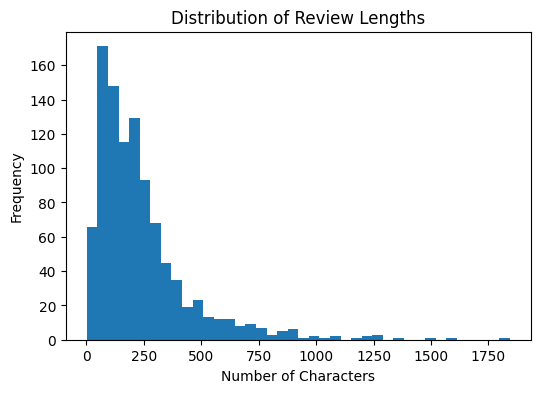

retailer
shoppers_ca    4.524752
ulta_us        4.220000
sephora_ca     4.040000
Name: rating, dtype: float64


In [9]:
import matplotlib.pyplot as plt

# Rating distribution
plt.figure(figsize=(6,4))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Review length analysis
df['review_length'] = df['review_text'].astype(str).apply(len)

plt.figure(figsize=(6,4))
df['review_length'].plot(kind='hist', bins=40)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Average rating per retailer
avg_rating = df.groupby('retailer')['rating'].mean().sort_values(ascending=False)
print(avg_rating)

In [10]:
# Average rating and review count per product
product_stats = (
    df.groupby('product_name')
      .agg(avg_rating=('rating', 'mean'),
           num_reviews=('rating', 'count'))
      .sort_values(by='avg_rating', ascending=False)
)

product_stats.head(10)


,avg_rating,num_reviews
product_name,,
Armani Luminous Foundation,4.480000,200
Estée Lauder Double Wear,4.406667,300
NARS Light Reflecting Foundation,4.046667,300
Dior Forever Skin Glow,4.044335,203


In [11]:
retailer_product_stats = (
    df.groupby(['retailer', 'product_name'])
      .agg(avg_rating=('rating', 'mean'),
           num_reviews=('rating', 'count'))
      .reset_index()
)

retailer_product_stats.head(10)


,retailer,product_name,avg_rating,num_reviews
0,sephora_ca,Armani Luminous Foundation,4.21,100
1,sephora_ca,Dior Forever Skin Glow,3.88,100
2,sephora_ca,Estée Lauder Double Wear,4.19,100
3,sephora_ca,NARS Light Reflecting Foundation,3.88,100
4,shoppers_ca,Armani Luminous Foundation,4.75,100
5,shoppers_ca,Dior Forever Skin Glow,5.00,3
6,shoppers_ca,Estée Lauder Double Wear,4.53,100
7,shoppers_ca,NARS Light Reflecting Foundation,4.28,100
8,ulta_us,Dior Forever Skin Glow,4.18,100
9,ulta_us,Estée Lauder Double Wear,4.50,100


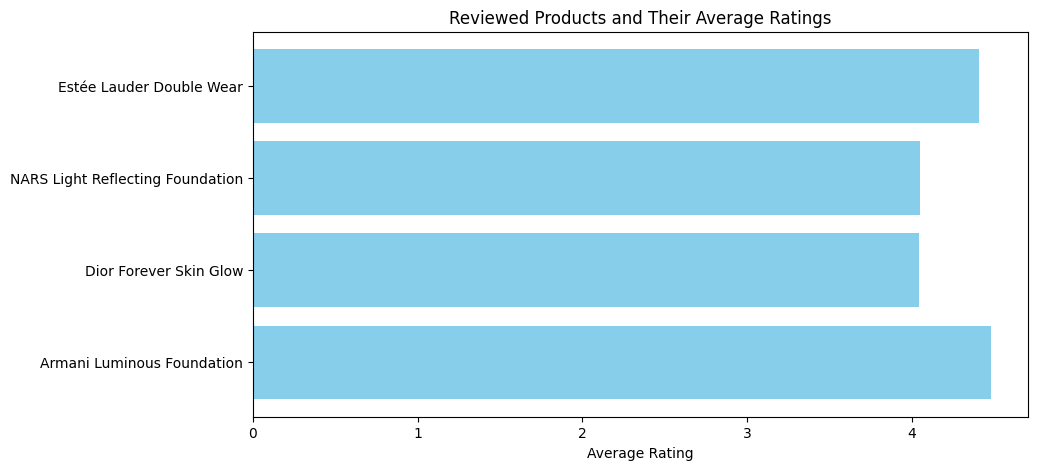

In [13]:
import matplotlib.pyplot as plt

# Top 10 most-reviewed products
top_products = product_stats.sort_values('num_reviews', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_products.index, top_products['avg_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Reviewed Products and Their Average Ratings')
plt.gca().invert_yaxis()
plt.show()
